# Applying Data Science to DS Job Hunting

## Indeed API
Indeed.com offers an a publisher's API for adding links in your web page or app. I decided to use this API
to gather a sample of job posting from which to scrape a list of skills.

The API will only return 25 maximum url's, so one needs a trick to get a significant amount of data. The trick I'm
using right now, is the query by zipcode. There are ~43K in the US so that's going to hopefully bring us some hits.

I'm currently preparing a MapReduce job using the MRJob Python package, but haven't finished it yet. So for now, I'm using 500 randomly selected samples of the ~43K zipcodes, returning from 0 to 25 urls from each.

## Parsing Out Skills
To parse out what I think are the skills, I use BeautifulSoup to iterate over the "span" sections with the class name "Summary". Then I locate the bulleted points:
<span class='summary'>
<li> SQL
<li> Python
<li> AWS
</span>
 
### Stop Words
I wanted a way to add new stop words. The word "data" obviously shows up many times and is not helpful.

## Bar Plot 
To count up the parsed skill tokens, I employ SciKit-Learn's CountVectorizer and produce a simple bar plot output.

## Explore Certain Words
The word "experience" showed up with a high count. I want to know if there's more to that. Experience with a platform, technology, SQL or jusy previous analytic experiece. NLP is a deep rabbit hole, and I only peered a short ways down for this project. 

My word radius method gathers words to the left and right of a chosen keyword, and builds a corpus from within that radius. Then I apply the CountVectorizer again.

In [20]:
import indeed_scrape
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (15.0, 8.0)

%matplotlib inline

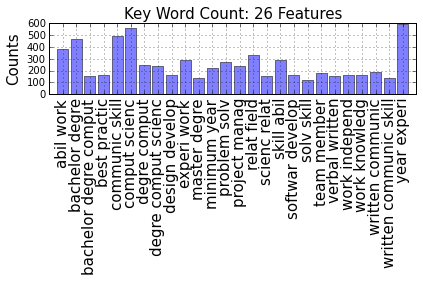

In [4]:
ind = indeed_scrape.Indeed()
ind.query = "data science"
ind.num_samples = 500
ind.stop_words = "data"
ind.main()

In [ ]:
import pandas as pd
df = pd.read_csv("data_frame.csv")
corpus = df['summary']

## Single Word n-gram 
Above I performd a bi-gram analysis.

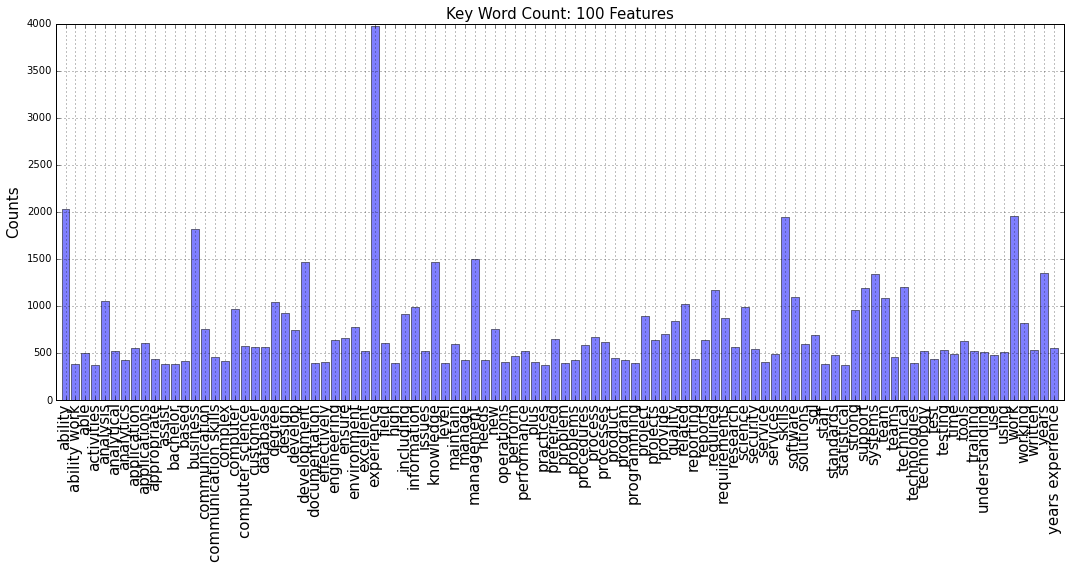

In [21]:
mat, fea = ind.vectorizer(corpus, n_min=1)
plt.figure(figsize=(15,8))
ind.plot_features(fea, mat)

In [6]:
out = ind.find_words_in_radius(corpus, 'experience', 5)

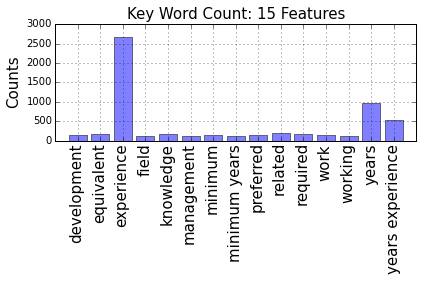

In [22]:
mat, fea = ind.vectorizer(out, max_features=30, n_min=1)
ind.plot_features(fea, mat)